In [1]:
pip install matplotlib opencv-python pycocotools

In [4]:
# For unziping the file into a folder called 'Pedestrian_dataset'
!unzip /content/Pedestrian_dataset_for_internship_assignment.zip -d /content/Pedestrian_dataset/


Archive:  /content/Pedestrian_dataset_for_internship_assignment.zip
   creating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/
  inflating: /content/Pedestrian_dataset/__MACOSX/._Pedestrian_dataset_for_internship_assignment  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/13199.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._13199.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/12046.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._12046.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/7440.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._7440.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/13984.jpg  
  inflating: /content/Pedestr

In [5]:
# Checking the files in the dataset directory
import os

dataset_dir = '/content/Pedestrian_dataset/'
print(os.listdir(dataset_dir))


['Pedestrian_dataset_for_internship_assignment', '__MACOSX']


In [7]:

dataset_dir = '/content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/'

# Number of images in the dataset folder
print(len(os.listdir(dataset_dir)))


202


In [ ]:
# For loading the annotations file
import json

with open('random_sample_mavi_2_gt.json', 'r') as f:
    annotations = json.load(f)


In [8]:
# For adding annotations in a dictionary
images = {image['id']: image for image in annotations['images']}
annotations_dict = {}


for ann in annotations['annotations']:
    image_id = ann['image_id']
    if image_id not in annotations_dict:
        annotations_dict[image_id] = []
    annotations_dict[image_id].append(ann)


print("Sample Image Data:", images[1])
print("Sample Annotations for Image 1:", annotations_dict[1])


Sample Image Data: {'height': 480, 'width': 640, 'id': 1, 'file_name': '1229.jpg'}
Sample Annotations for Image 1: [{'iscrowd': 0, 'image_id': 1, 'bbox': [297, 262, 12, 33], 'segmentation': [], 'category_id': 1, 'id': 1, 'area': 396, 'ignore': 0, 'vis_ratio': 1.0, 'height': 33}, {'iscrowd': 0, 'image_id': 1, 'bbox': [296, 263, 12, 31], 'segmentation': [], 'category_id': 1, 'id': 2, 'area': 372, 'ignore': 0, 'vis_ratio': 1.0, 'height': 31}]


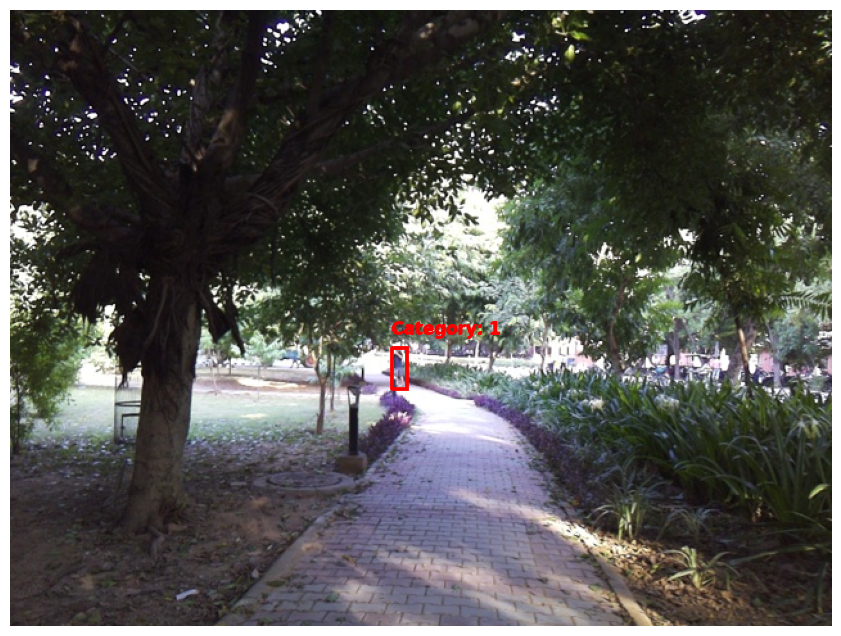

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

# Function to visualize an image with bounding boxes
def show_image_with_boxes(image_path, annotations):

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)  # Displaying the image


    for ann in annotations:
        bbox = ann['bbox']  # Extract the bounding box [x, y, width, height]
        # Creating a rectangle patch with red borders
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Adding a label for the category
        category_id = ann['category_id']
        ax.text(bbox[0], bbox[1] - 10, f'Category: {category_id}', color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

# Example: Visualize the first image with bounding boxes using the file_name
image_id = 1
image_info = images[image_id]
image_filename = image_info['file_name']
image_path = os.path.join(dataset_dir, image_filename)

# Visualizing the image and the associated annotations
show_image_with_boxes(image_path, annotations_dict[image_id])


In [10]:

categories = annotations['categories']

# Print the number of categories
num_categories = len(categories)
print(f"Number of categories: {num_categories}")

# print the category names and their IDs
for category in categories:
    print(f"Category ID: {category['id']}, Name: {category['name']}")


Number of categories: 1
Category ID: 1, Name: pedestrian


In [11]:
import os
import json
import random
import shutil

# Define paths for dataset and the split directories
dataset_dir = '/content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/'
train_dir = '/content/Pedestrian_dataset/train/'
val_dir = '/content/Pedestrian_dataset/val/'

# Create train and val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loading the JSON annotations file
annotations_path = 'random_sample_mavi_2_gt.json'
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

# Spliting the images into 160 for training and 40 for validation
images = annotations['images']
random.shuffle(images)  # Shuffling the images to ensure random split
train_images = images[:160]
val_images = images[160:]

# Creating mappings for image IDs to annotations
train_image_ids = set([img['id'] for img in train_images])
val_image_ids = set([img['id'] for img in val_images])

# Spliting annotations based on image_id
train_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] in train_image_ids]
val_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] in val_image_ids]

# Creating new COCO-style JSON files for train and val
train_coco = {
    'images': train_images,
    'annotations': train_annotations,
    'categories': annotations['categories']
}

val_coco = {
    'images': val_images,
    'annotations': val_annotations,
    'categories': annotations['categories']
}

# Saving the new annotations for training and validation sets
with open(os.path.join(train_dir, 'annotations.json'), 'w') as f:
    json.dump(train_coco, f)

with open(os.path.join(val_dir, 'annotations.json'), 'w') as f:
    json.dump(val_coco, f)


In [12]:
# Copying training images
for img in train_images:
    src_img_path = os.path.join(dataset_dir, img['file_name'])
    dst_img_path = os.path.join(train_dir, img['file_name'])
    shutil.copy(src_img_path, dst_img_path)

# Copying validation images
for img in val_images:
    src_img_path = os.path.join(dataset_dir, img['file_name'])
    dst_img_path = os.path.join(val_dir, img['file_name'])
    shutil.copy(src_img_path, dst_img_path)


In [13]:
# List the number of files in each directory
print(f"Number of training images: {len(os.listdir(train_dir)) - 1}")  # Subtract 1 for annotations.json
print(f"Number of validation images: {len(os.listdir(val_dir)) - 1}")  # Subtract 1 for annotations.json


Number of training images: 160
Number of validation images: 39


In [14]:
!git clone https://github.com/IDEA-Research/DINO


Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 14.73 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [15]:
cd DINO


/content/DINO


In [16]:
!pip install -r requirements.txt


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-_kmwpb22/pycocotools_a7cce3a653d04c39b8361e1adb3a50a1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-_kmwpb22/pycocotools_a7cce3a653d04c39b8361e1adb3a50a1
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-_kmwpb22/panopticapi_e47649f681d74c789c3c8755775add39
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-_kmwpb22/panopticapi_e47649f681d74c789c3c8755775add39
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [17]:
# Creating the directory structure
!mkdir -p /content/COCODIR/train2017
!mkdir -p /content/COCODIR/val2017
!mkdir -p /content/COCODIR/annotations


In [18]:
import shutil
import os

# Paths to train and val directories
train_dir = '/content/Pedestrian_dataset/train'
val_dir = '/content/Pedestrian_dataset/val'

# Destination paths for the COCO-like structure
coco_train_dir = '/content/COCODIR/train2017/'
coco_val_dir = '/content/COCODIR/val2017/'

# Moving training images
for img_file in os.listdir(train_dir):
    if img_file.endswith('.jpg'):  # Assuming images are in .jpg format
        shutil.copy(os.path.join(train_dir, img_file), coco_train_dir)

# Moving validation images
for img_file in os.listdir(val_dir):
    if img_file.endswith('.jpg'):
        shutil.copy(os.path.join(val_dir, img_file), coco_val_dir)


In [19]:
# Moving and renaming annotations for COCO structure
!cp /content/Pedestrian_dataset/train/annotations.json /content/COCODIR/annotations/instances_train2017.json
!cp /content/Pedestrian_dataset/val/annotations.json /content/COCODIR/annotations/instances_val2017.json


In [20]:
!pip install huggingface_hub


In [27]:
!cp checkpoint0011_4scale.pth DINO/


In [31]:
!pip uninstall -y yapf


Found existing installation: yapf 0.40.2
Uninstalling yapf-0.40.2:
  Successfully uninstalled yapf-0.40.2


In [32]:
!pip install yapf==0.31.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.7/185.7 kB 17.1 MB/s eta 0:00:00


In [29]:
%cd /content/DINO/

/content/DINO


In [46]:
!bash scripts/DINO_train.sh /content/COCODIR \
  --pretrain_model_path /content/DINO/checkpoint0011_4scale.pth \
  --finetune_ignore label_enc.weight class_embed

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:23:02.057]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:23:02.057]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:23:02.058]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[09/24 11:23:02.058]: world size: 1
[09/24 11:23:02.058]: rank: 0
[09/24 11:23:02.058]: local_rank: 0
[09/24 11:23:02.058]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_size=False, output_dir='logs/DINO/R50-MS4', note='', device='cu

In [45]:
%cd /content/DINO/

/content/DINO


In [47]:
!bash scripts/DINO_eval.sh /content/COCODIR /content/DINO/checkpoint0011_4scale.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:25:02.685]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:25:02.685]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --eval --resume /content/DINO/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:25:02.686]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 11:25:02.686]: world size: 1
[09/24 11:25:02.686]: rank: 0
[09/24 11:25:02.686]: local_rank: 0
[09/24 11:25:02.686]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_s

In [52]:
pip install --upgrade pycocotools


  Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (427 kB)
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [50]:
!bash scripts/DINO_train.sh /content/COCODIR

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:32:03.745]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:32:03.746]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:32:03.746]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[09/24 11:32:03.746]: world size: 1
[09/24 11:32:03.746]: rank: 0
[09/24 11:32:03.746]: local_rank: 0
[09/24 11:32:03.747]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_size=False, output_dir='logs/DINO/R50-MS4', note='', device='cu

In [53]:
# for training
!bash scripts/DINO_train.sh /content/COCODIR \
  --pretrain_model_path /content/DINO/checkpoint0011_4scale.pth \
  --finetune_ignore label_enc.weight class_embed \
  --epochs 10 \
  --lr_drop 20 \
  --num_classes 1


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:40:35.601]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:40:35.602]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:40:35.602]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[09/24 11:40:35.602]: world size: 1
[09/24 11:40:35.602]: rank: 0
[09/24 11:40:35.602]: local_rank: 0
[09/24 11:40:35.602]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_size=False, output_dir='logs/DINO/R50-MS4', note='', device='cu

In [54]:
# for evaluation
!bash scripts/DINO_eval.sh /content/COCODIR /content/DINO/checkpoint0011_4scale.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:57:40.245]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:57:40.248]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --eval --resume /content/DINO/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:57:40.249]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 11:57:40.249]: world size: 1
[09/24 11:57:40.249]: rank: 0
[09/24 11:57:40.249]: local_rank: 0
[09/24 11:57:40.249]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_s

In [76]:
!bash scripts/DINO_train.sh /content/COCODIR \
  --pretrain_model_path /content/DINO/checkpoint0011_4scale.pth \
  --finetune_ignore label_enc.weight class_embed \
  --epochs 24 \
  --lr_drop 20 \
  --num_classes 1 \
  --num_workers 2  # Set DataLoader to use 2 workers


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 12:41:59.085]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[09/24 12:41:59.085]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 12:41:59.085]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[09/24 12:41:59.085]: world size: 1
[09/24 12:41:59.086]: rank: 0
[09/24 12:41:59.086]: local_rank: 0
[09/24 12:41:59.086]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_size=False, output_dir='logs/DINO/R50-MS4', no

In [108]:
!bash scripts/DINO_train.sh /content/COCODIR \
  --pretrain_model_path /content/DINO/checkpoint0011_4scale.pth \
  --finetune_ignore label_enc.weight class_embed \
  --epochs 24 \
  --lr_drop 20 \
  --num_classes 1
 # Set DataLoader to use 2 workers

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 13:40:27.489]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[09/24 13:40:27.489]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/COCODIR --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 13:40:27.490]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[09/24 13:40:27.490]: world size: 1
[09/24 13:40:27.490]: rank: 0
[09/24 13:40:27.490]: local_rank: 0
[09/24 13:40:27.490]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCODIR', coco_panoptic_path=None, remove_difficult=False, fix_size=False, output_dir='logs/DINO/R50-MS4', no